<a href="https://colab.research.google.com/github/EggsyOnCode/JsApp-docker-container/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Farzan Saqib
# CMS: 417633
# BESE13A - ML Lab 2

In [ ]:
# Task 1: Data Loading and Exploration

import pandas as pd

# Step 1: Load the Titanic Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 2: Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn Names:")
print(df.columns)

print("\nData Types of Each Column:")
print(df.dtypes)

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


print("\nMissing Values in Each Column:")
print(df.isnull().sum())



First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

# Discussion on missing values:
# - The "Age" column has missing values, which could impact any analysis involving passenger age.
# - The "Cabin" column has a significant number of missing values, meaning we might need to drop it or impute missing values.
# - The "Embarked" column has a few missing values, which might require filling with the most frequent value.



In [ ]:
# Task 2: Data Cleaning and Manipulation

import pandas as pd

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# 1. Handle Missing Values

# Fill missing values in the 'Age' column with the median age using .loc
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())

# Drop rows where 'Fare' is zero
df = df[df['Fare'] > 0].copy()  # Use .copy() to ensure we work with a fresh DataFrame

# 2. Create New Features

# Add a 'family_size' feature (sum of siblings/spouses and parents/children)
df.loc[:, 'family_size'] = df['SibSp'] + df['Parch']

# Create a 'travel_alone' feature (1 if no family members, otherwise 0)
df.loc[:, 'travel_alone'] = (df['family_size'] == 0).astype(int)

# 3. Filter Data

# Select passengers aged between 18 and 50 and create a new DataFrame
filtered_df = df.loc[(df['Age'] >= 18) & (df['Age'] <= 50)].copy()

# Display results
print("Cleaned Dataset Preview:")
print(df.head())

print("\nFiltered Dataset (Passengers Aged 18-50) Preview:")
print(filtered_df.head())


Cleaned Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  family_size  travel_alone  
0      0         A/5 21171   7.2500   NaN        S            1             0  
1      0          PC 17599  71.2833   C85        C            1             0  
2      0  STON/O2. 3101282   7.9250   NaN        S     

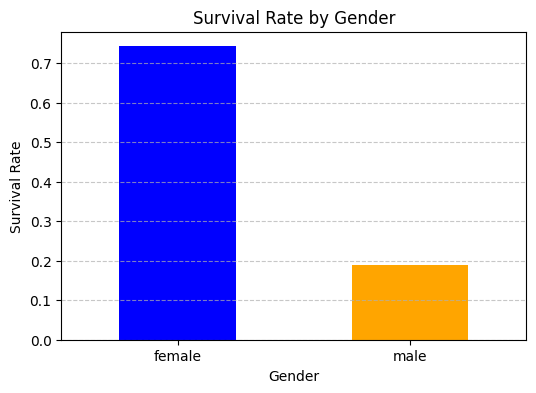

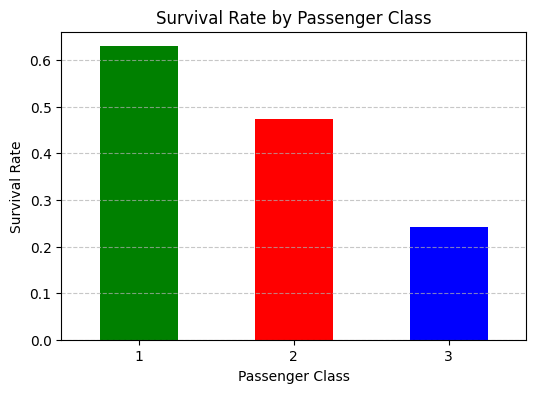

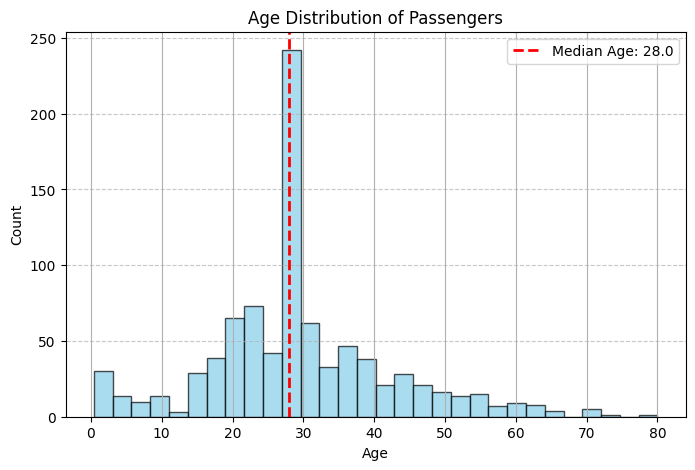

<Figure size 700x500 with 0 Axes>

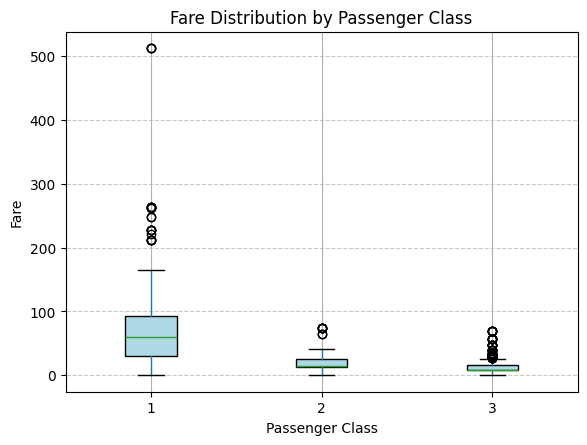

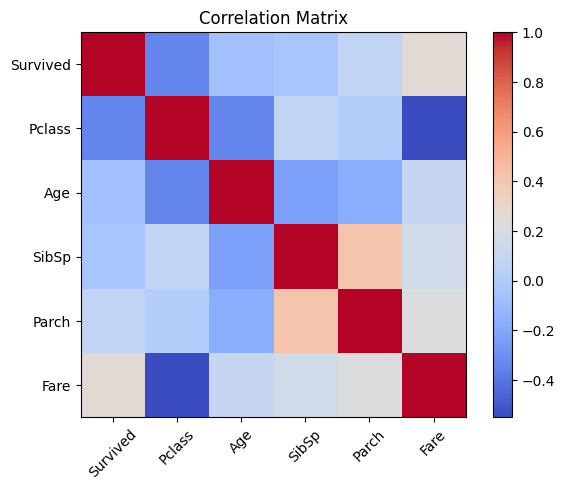

In [ ]:
# Task 3: Exploratory Data Analysis (EDA) using Matplotlib and Pandas

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Fill missing values before EDA
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

### 1. Analyze Categorical Variables ###

# Survival Rate by Gender
survival_by_gender = df.groupby("Sex")["Survived"].mean()

plt.figure(figsize=(6, 4))
survival_by_gender.plot(kind="bar", color=["blue", "orange"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n")

# Survival Rate by Passenger Class
survival_by_pclass = df.groupby("Pclass")["Survived"].mean()

plt.figure(figsize=(6, 4))
survival_by_pclass.plot(kind="bar", color=["green", "red", "blue"])
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("\n")

### 2. Analyze Numerical Variables ###

# Histogram for Age with Median Overlay
plt.figure(figsize=(8, 5))
df["Age"].hist(bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(df["Age"].median(), color="red", linestyle="dashed", linewidth=2, label=f"Median Age: {df['Age'].median():.1f}")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n")

# Box Plot of Fare Across Passenger Classes
plt.figure(figsize=(7, 5))
df.boxplot(column="Fare", by="Pclass", patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Fare Distribution by Passenger Class")
plt.suptitle("")  # Remove default Matplotlib subtitle
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n")

### 3. Detect Correlations ###

# Compute correlation matrix
correlation_matrix = df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr()

# Heatmap-style visualization using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


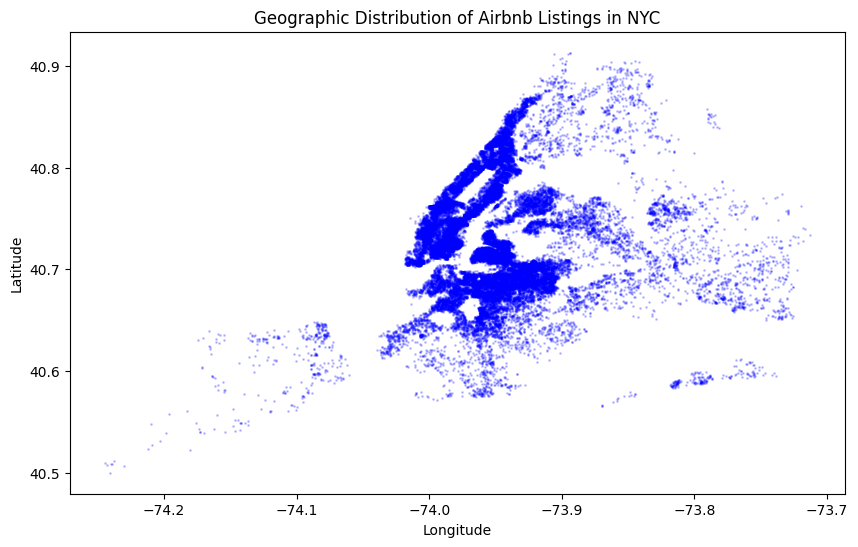

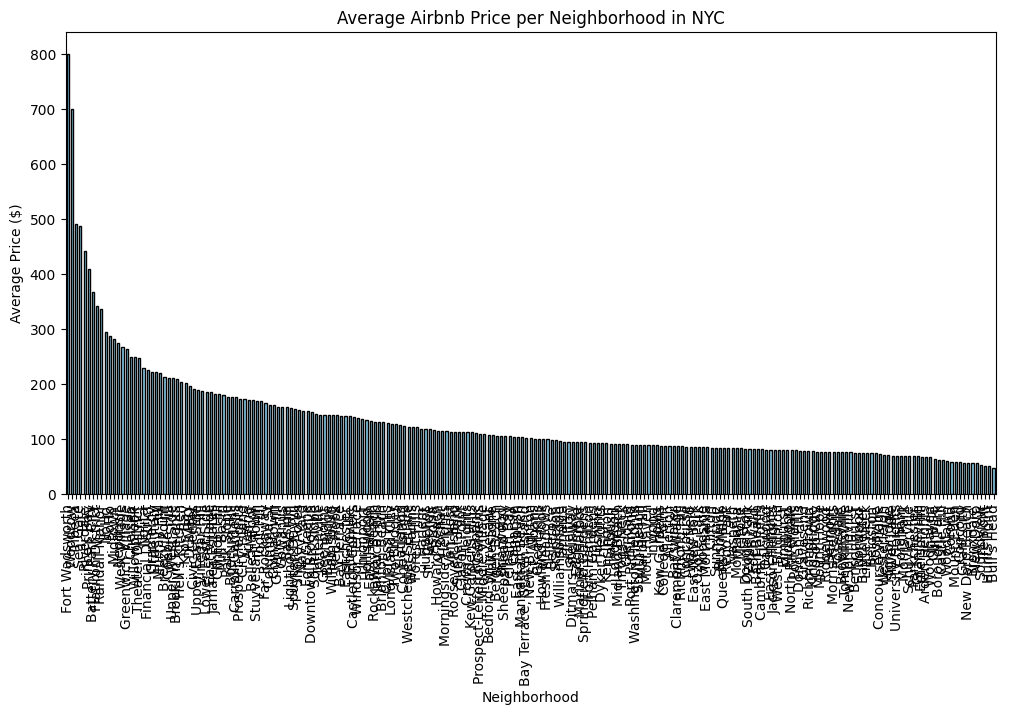

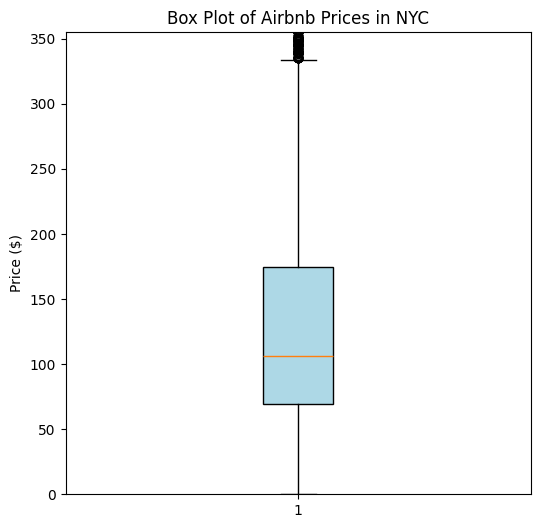

In [ ]:
# Task 4

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AB_NYC_2019.csv")

# 1. Geospatial Distribution of Listings
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.2, s=1, c='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Airbnb Listings in NYC")
plt.show()

print("\n")

# 2. Bar Plot of Average Price per Neighborhood
avg_price_per_neighborhood = df.groupby("neighbourhood")['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_price_per_neighborhood.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Neighborhood")
plt.ylabel("Average Price ($)")
plt.title("Average Airbnb Price per Neighborhood in NYC")
plt.xticks(rotation=90)
plt.show()

print("\n")


# 3. Box Plot to Identify Outliers in the Price Column
plt.figure(figsize=(6, 6))
plt.boxplot(df['price'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("Price ($)")
plt.title("Box Plot of Airbnb Prices in NYC")
plt.ylim(0, df['price'].quantile(0.95))  # Limiting the y-axis to exclude extreme outliers
plt.show()

print("\n")


### **Lab Report: Data Manipulation and Exploratory Data Analysis (EDA)**  

#### **1. Understanding of Concepts**  
In this lab, I applied key data manipulation and EDA techniques using Pandas and Matplotlib. I handled missing values by filling them with appropriate statistics (e.g., median for age). I also created new features such as `family_size` and `travel_alone` to derive insights from existing data. Additionally, I explored numerical and categorical variables using visualizations, including histograms, scatter plots, and box plots.  

**New Skills Gained:**  
- Handling missing values effectively  
- Creating and analyzing new features  
- Visualizing data to identify trends and relationships  
- Detecting correlations among variables  

#### **2. Example**  
Through this lab, I learned how to handle missing values effectively using Pandas and how to create new features to extract meaningful insights. The correlation matrix visualization was particularly insightful for identifying relationships among variables.  

#### **3. Challenges Faced**  
One challenge I encountered was a **SettingWithCopyWarning** while modifying DataFrame columns. This happened because I was modifying a copy of a slice instead of the original DataFrame.  

**Solution:** I resolved this issue by using the `.loc[]` method to ensure changes were applied correctly to the original dataset. Additionally, I faced difficulties in adjusting the y-axis scale in box plots to exclude extreme outliers, which I resolved by using quantiles to set axis limits.  

#### **4. Example**  
I initially struggled with visualizing correlations using a heatmap. After referring to the Pandas and Matplotlib documentation, I realized I needed to preprocess the data to exclude non-numerical columns before plotting.  

